In [ ]:
!ln -s "/content/drive/My Drive/Unifor projects/Project_MPCE/dados" dados

ln: failed to create symbolic link 'dados/dados': Operation not supported


# Teste 1

(22, 186)
maior 5000
approx
[[[258 222]]

 [[118 338]]

 [[298 569]]

 [[452 425]]]
480
Result


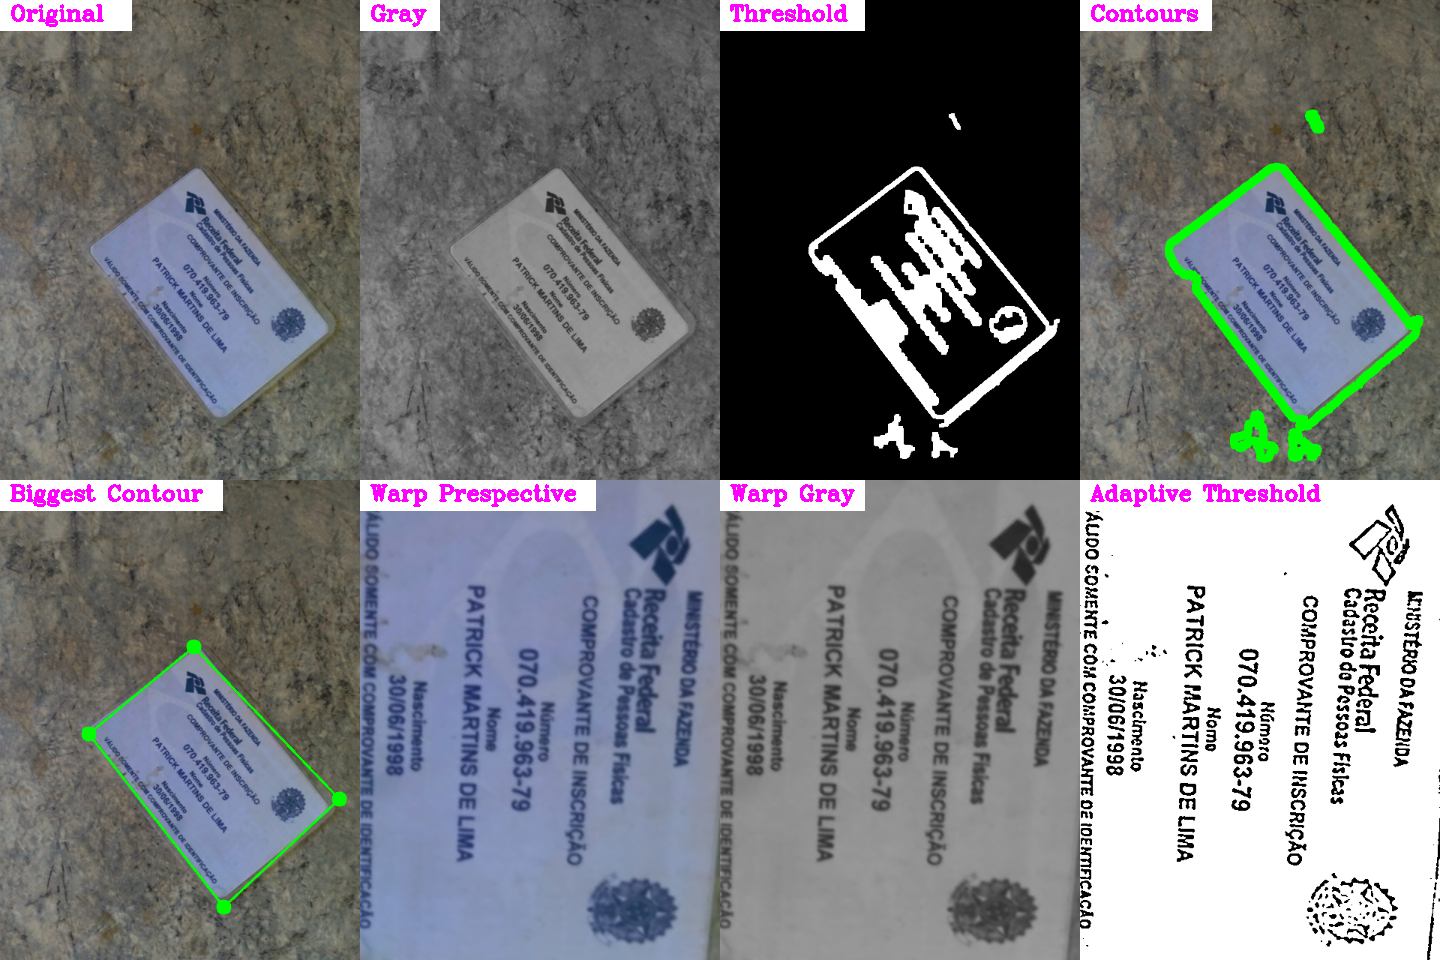

Result


In [ ]:
# codigo base https://github.com/murtazahassan/Document-Scanner

Threshold1 =22
Threshold2 =186
import cv2
import numpy as np
from dados import utlis
from google.colab.patches import cv2_imshow

########################################################################
webCamFeed = True
pathImage = "dados/3.jpeg"
# cap = cv2.VideoCapture(1)
# cap.set(10,160)
heightImg = 640
widthImg  = 480
########################################################################

# utlis.initializeTrackbars()
count=0
img = cv2.imread(pathImage)
img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGING IF REQUIRED
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR


thres=(Threshold1,Threshold2) #utlis.valTrackbars() # GET TRACK BAR VALUES FOR THRESHOLDS
print(thres)
imgThreshold = cv2.Canny(imgBlur,thres[0],thres[1]) # APPLY CANNY BLUR
kernel = np.ones((5, 5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLY DILATION
imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION

## FIND ALL COUNTOURS
imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS


# FIND THE BIGGEST COUNTOUR
biggest, maxArea = utlis.biggestContour(contours) # FIND THE BIGGEST CONTOUR

if biggest.size != 0: 
    biggest=utlis.reorder(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
    imgBigContour = utlis.drawRectangle(imgBigContour,biggest,2)
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

    #REMOVE 20 PIXELS FORM EACH SIDE
    imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
    imgWarpColored = cv2.resize(imgWarpColored,(widthImg,heightImg))

    # APPLY ADAPTIVE THRESHOLD
    imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
    imgAdaptiveThre= cv2.adaptiveThreshold(imgWarpGray, 255, 1, 1, 7, 2)
    imgAdaptiveThre = cv2.bitwise_not(imgAdaptiveThre)
    imgAdaptiveThre=cv2.medianBlur(imgAdaptiveThre,3)

    # Image Array for Display
    imageArray = ([img,imgGray,imgThreshold,imgContours],
                    [imgBigContour,imgWarpColored, imgWarpGray,imgAdaptiveThre])
    lables = [["Original","Gray","Threshold","Contours"],
                ["Biggest Contour","Warp Prespective","Warp Gray","Adaptive Threshold"]]
    stackedImage = utlis.stackImages(imageArray,0.75,lables)
    print('Result')
    # stackedImage = cv2.resize(stackedImage, (500, 500))
    cv2_imshow(stackedImage)

    # SAVE IMAGE WHEN 's' key is pressed
    print('Result')
    # cv2_imshow(imgWarpColored)
    # cv2.imwrite(f"dados/myImage,{Threshold1},{Threshold2}.jpg",imgWarpColored)

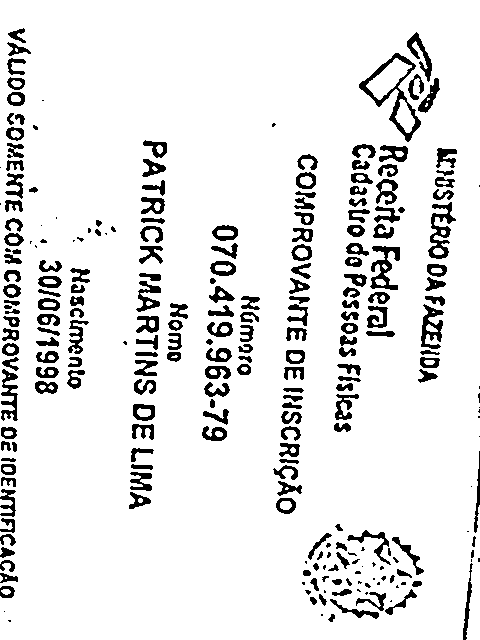

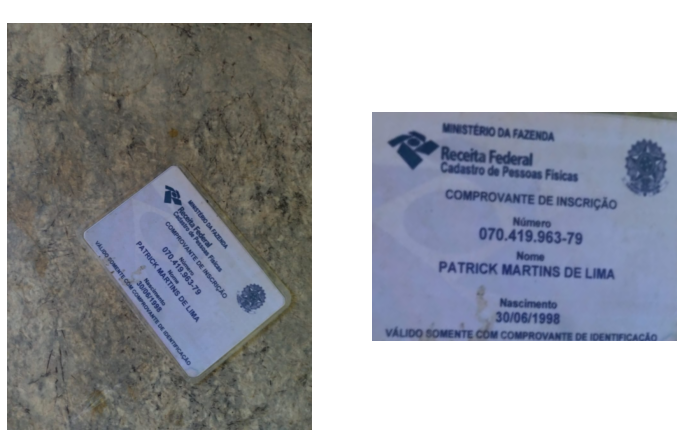

Resultado do OCR:

a
MINESTERIO DA FAZENDA
Fr. @&
COMPROVANTE DE INSCRICAO
Numero
070.419.963-79
Nome
PATRICK MARTINS DE LIMA
© estmsate

VALIDO SOMENTE COM COMPROVANTE DE IDENTWiCACAO



In [ ]:
# codigo base http://pythonclub.com.br/extraindo-texto-de-imagens-com-python.html

from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR

import matplotlib.pyplot as plt

# img = cv2.imread('/content/dados/myImage,22,186.jpg')
img = imgWarpColored
# img = imgWarpGray
# img = imgAdaptiveThre

cv2_imshow(imgAdaptiveThre)
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


text = pytesseract.image_to_string( img,lang='eng' )

# Get bounding box estimates
# print(pytesseract.image_to_boxes(img))

# # Get verbose data including boxes, confidences, line and page numbers
# print(pytesseract.image_to_data(img))

# while len(text)==1:
    
#     text = pytesseract.image_to_string( img )

org_img = cv2.imread(pathImage)
Shape = org_img.shape
org_img = cv2.resize(org_img, ( int(Shape[1]/2),int(Shape[0]/2)))
org_img = cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12,9))
plt.rcParams['text.color'] = "w"

plt.subplot(1,2,1)
plt.axis('off')
plt.title("Original")
plt.imshow(org_img)
# cv2_imshow(org_img)

plt.subplot(1,2,2)
plt.axis('off')
plt.title("Ajustada")
plt.imshow(img)
# cv2_imshow(img)

plt.show()

print("Resultado do OCR:\n")
print(text)



# How To Build a Kick-Ass Mobile Document Scanner in Just 5 Minutes

## instalar

In [ ]:
!python -m pip install -U scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.17.2)


In [ ]:
!apt-get install tesseract-ocr tesseract-ocr-por
!apt-get install python-dev python3-dev build-essential liblcms2-dev zlib1g-dev libtiff5-dev libjpeg8-dev libfreetype6-dev libwebp-dev
!pip install Pillow
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
libfreetype6-dev is already the newest version (2.8.1-2ubuntu2).
libjpeg8-dev is already the newest version (8c-2ubuntu8).
libwebp-dev is already the newest version (0.6.1-2).
python-dev is already the newest version (2.7.15~rc1-1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
liblcms2-dev is already the newest version (2.9-1ubuntu0.1).
libtiff5-dev is already the newest version (4.0.9-5ubuntu0.3).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 21 not u

## Rodar

### Ajuste de pespectiva

In [ ]:
# pathImage = "dados/CPFw.jpg"
# img= cv2.imread(pathImage)
# cv2.imwrite(f"dados/CPFw.jpeg",img)

In [ ]:
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) >= 4:
                print(approx)
                biggest = np.array(approx).reshape(len(approx), 2).tolist()
                max_area = area

    if len(biggest)>=4:
        biggest.sort(key=lambda x : x[0])
        t=[biggest.pop(0),biggest.pop(-1)]
        biggest.sort(key=lambda x : x[1])
        t.append(biggest.pop(0))
        t.append(biggest.pop(-1))

        t.sort(key=lambda x : x[1])
        t1=[t.pop(0)]
        t1.append(t.pop(0))
        t1.sort(key=lambda x : x[0])
        t.sort(key=lambda x : x[0])
    

        biggest = [t1[0],t1[1],t[0],t[1]]
        print(biggest)

    return biggest,max_area

In [ ]:
def dots(img,dots,ratio=1):
    for i in dots:
        print(i)
        p1,p2=i
        img = cv2.circle(img,(int(p1/ratio),int(p2/ratio)), 3, (0,0,255), thickness=3)
    cv2_imshow(img)
    # cv2_imshow(imutils.resize(img , height = 800))

In [ ]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	#rect = order_points(pts)
	(tl, tr, br, bl) = pts
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

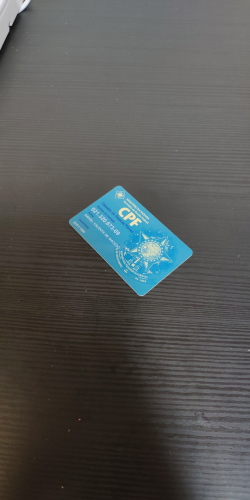

STEP 1: Edge Detection


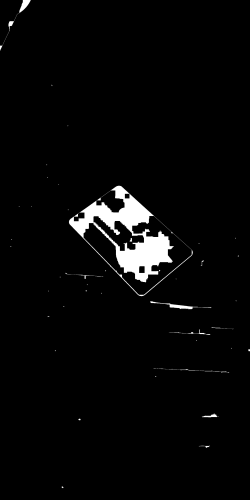

STEP 2: Find contours of paper
[[[ 952 1498]]

 [[ 556 1795]]

 [[1150 2386]]

 [[1553 2028]]]
[[556, 1795], [952, 1498], [1150, 2386], [1553, 2028]]
[556, 1795]
[952, 1498]
[1150, 2386]
[1553, 2028]


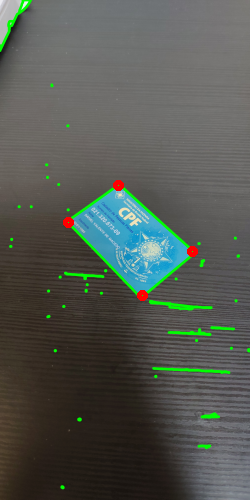

[[556, 1795], [952, 1498], [1150, 2386], [1553, 2028]]
recortando
STEP 3: Apply perspective transform


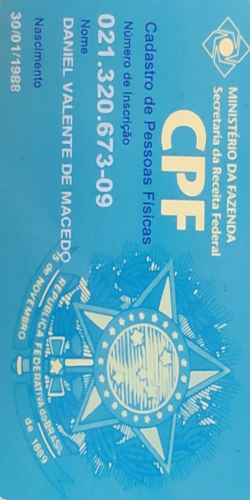

STEP 3: Apply 'black and white' paper effect


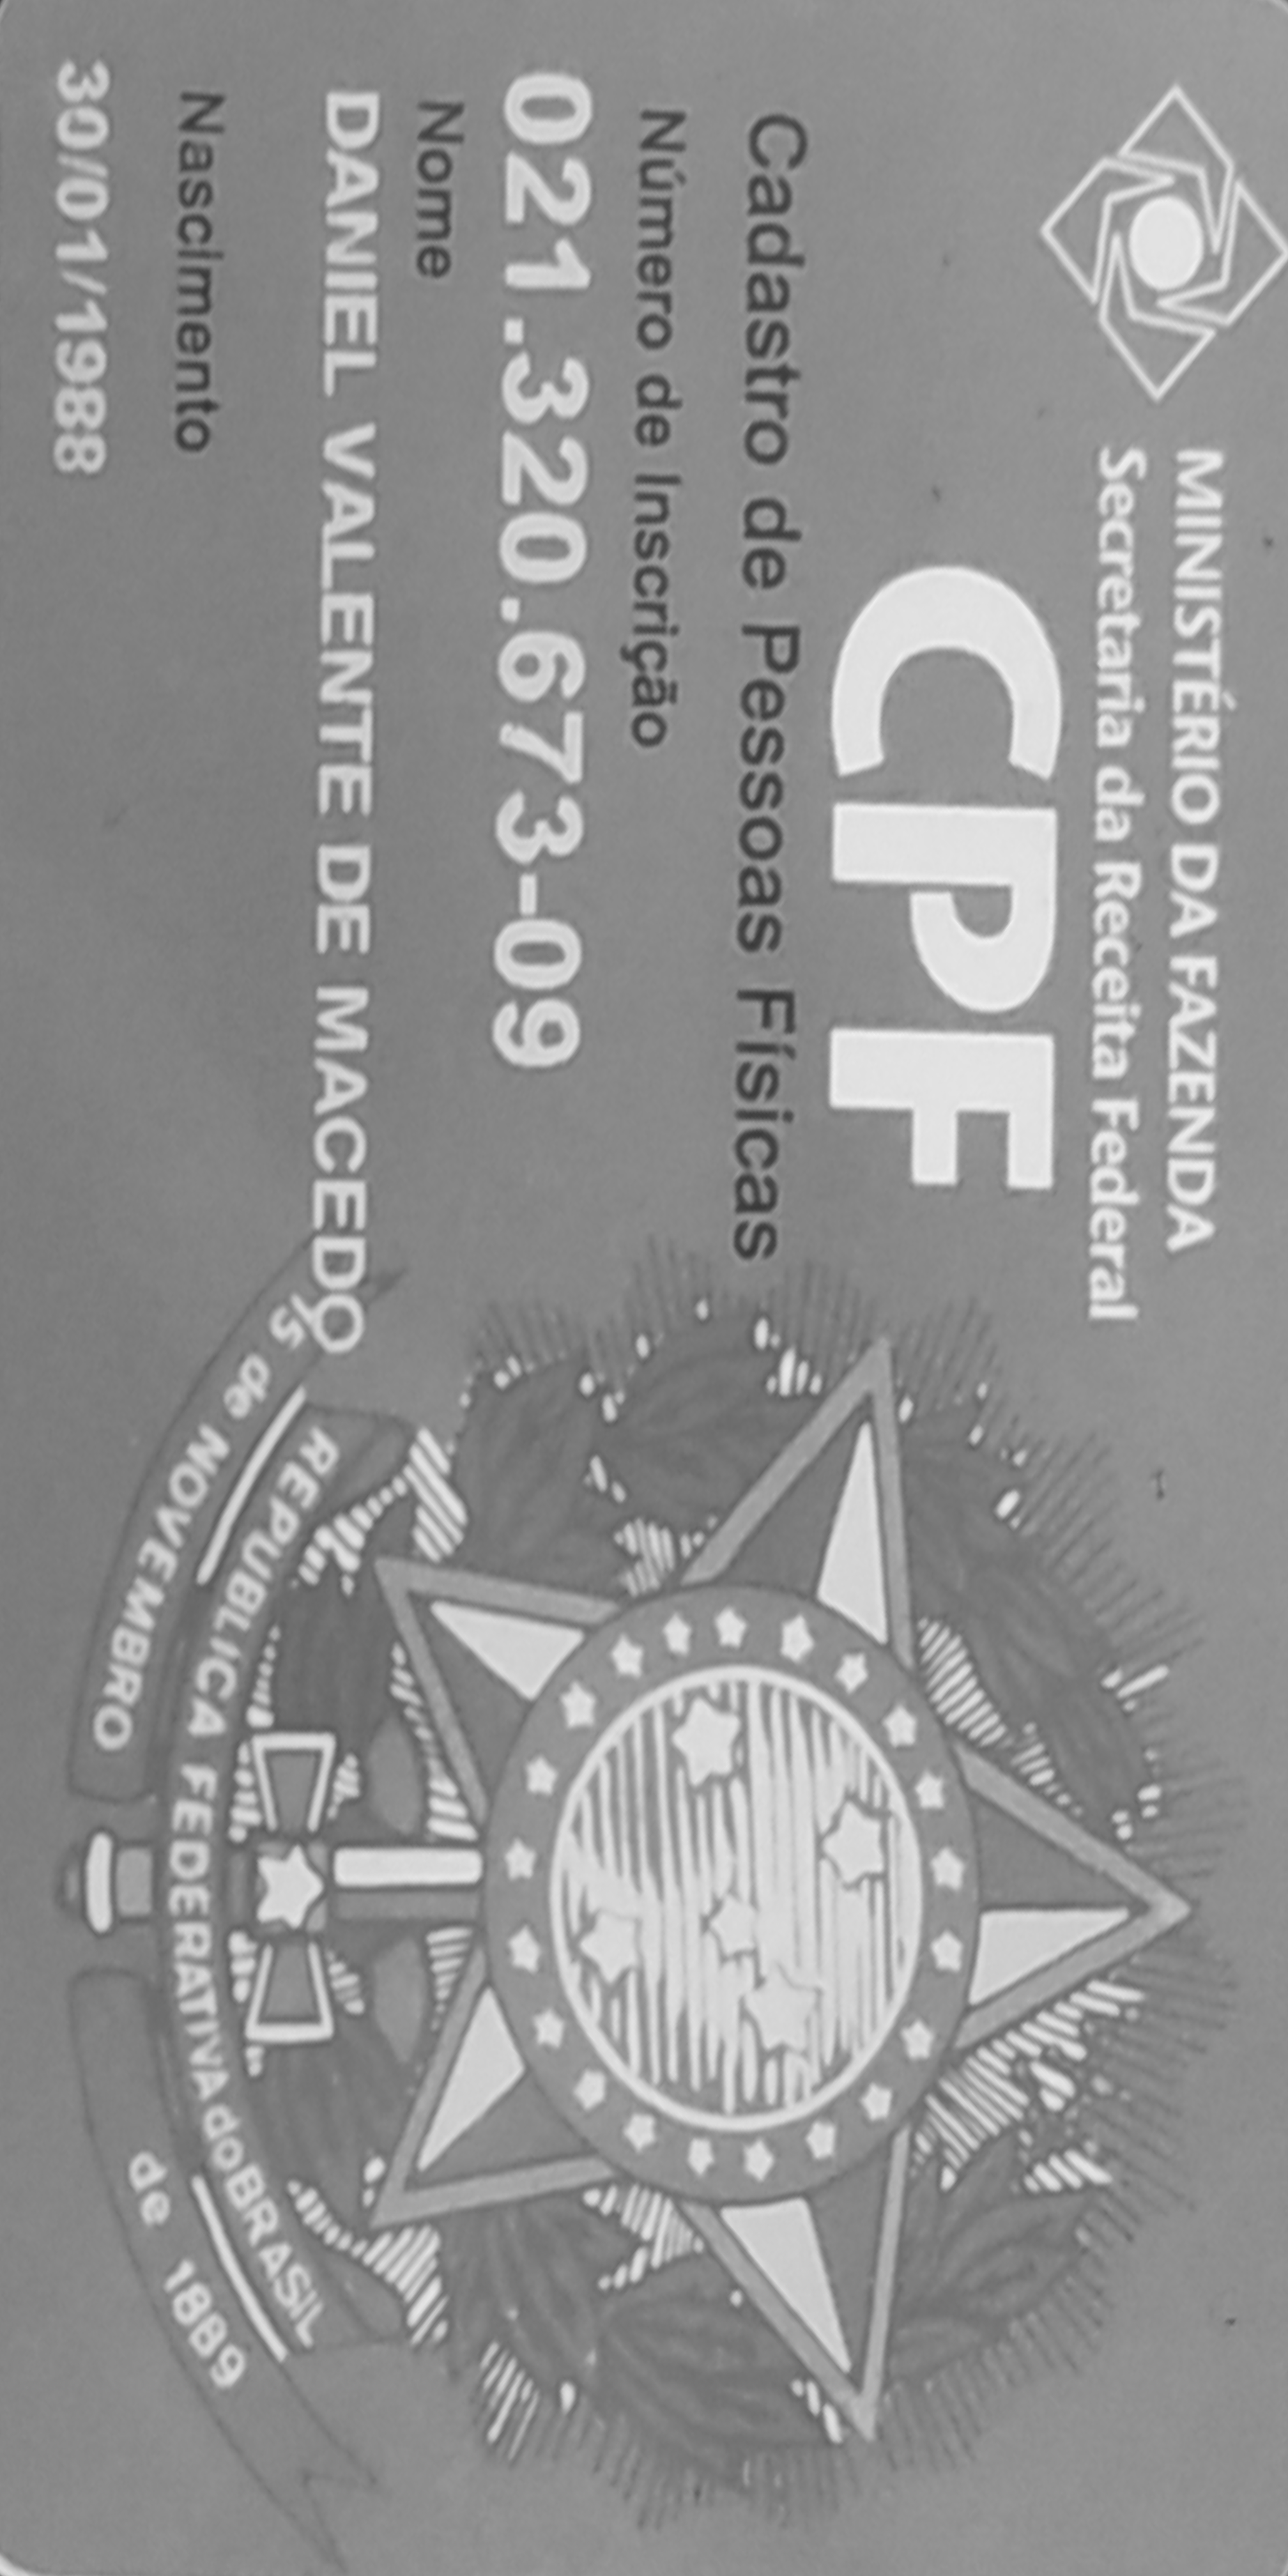

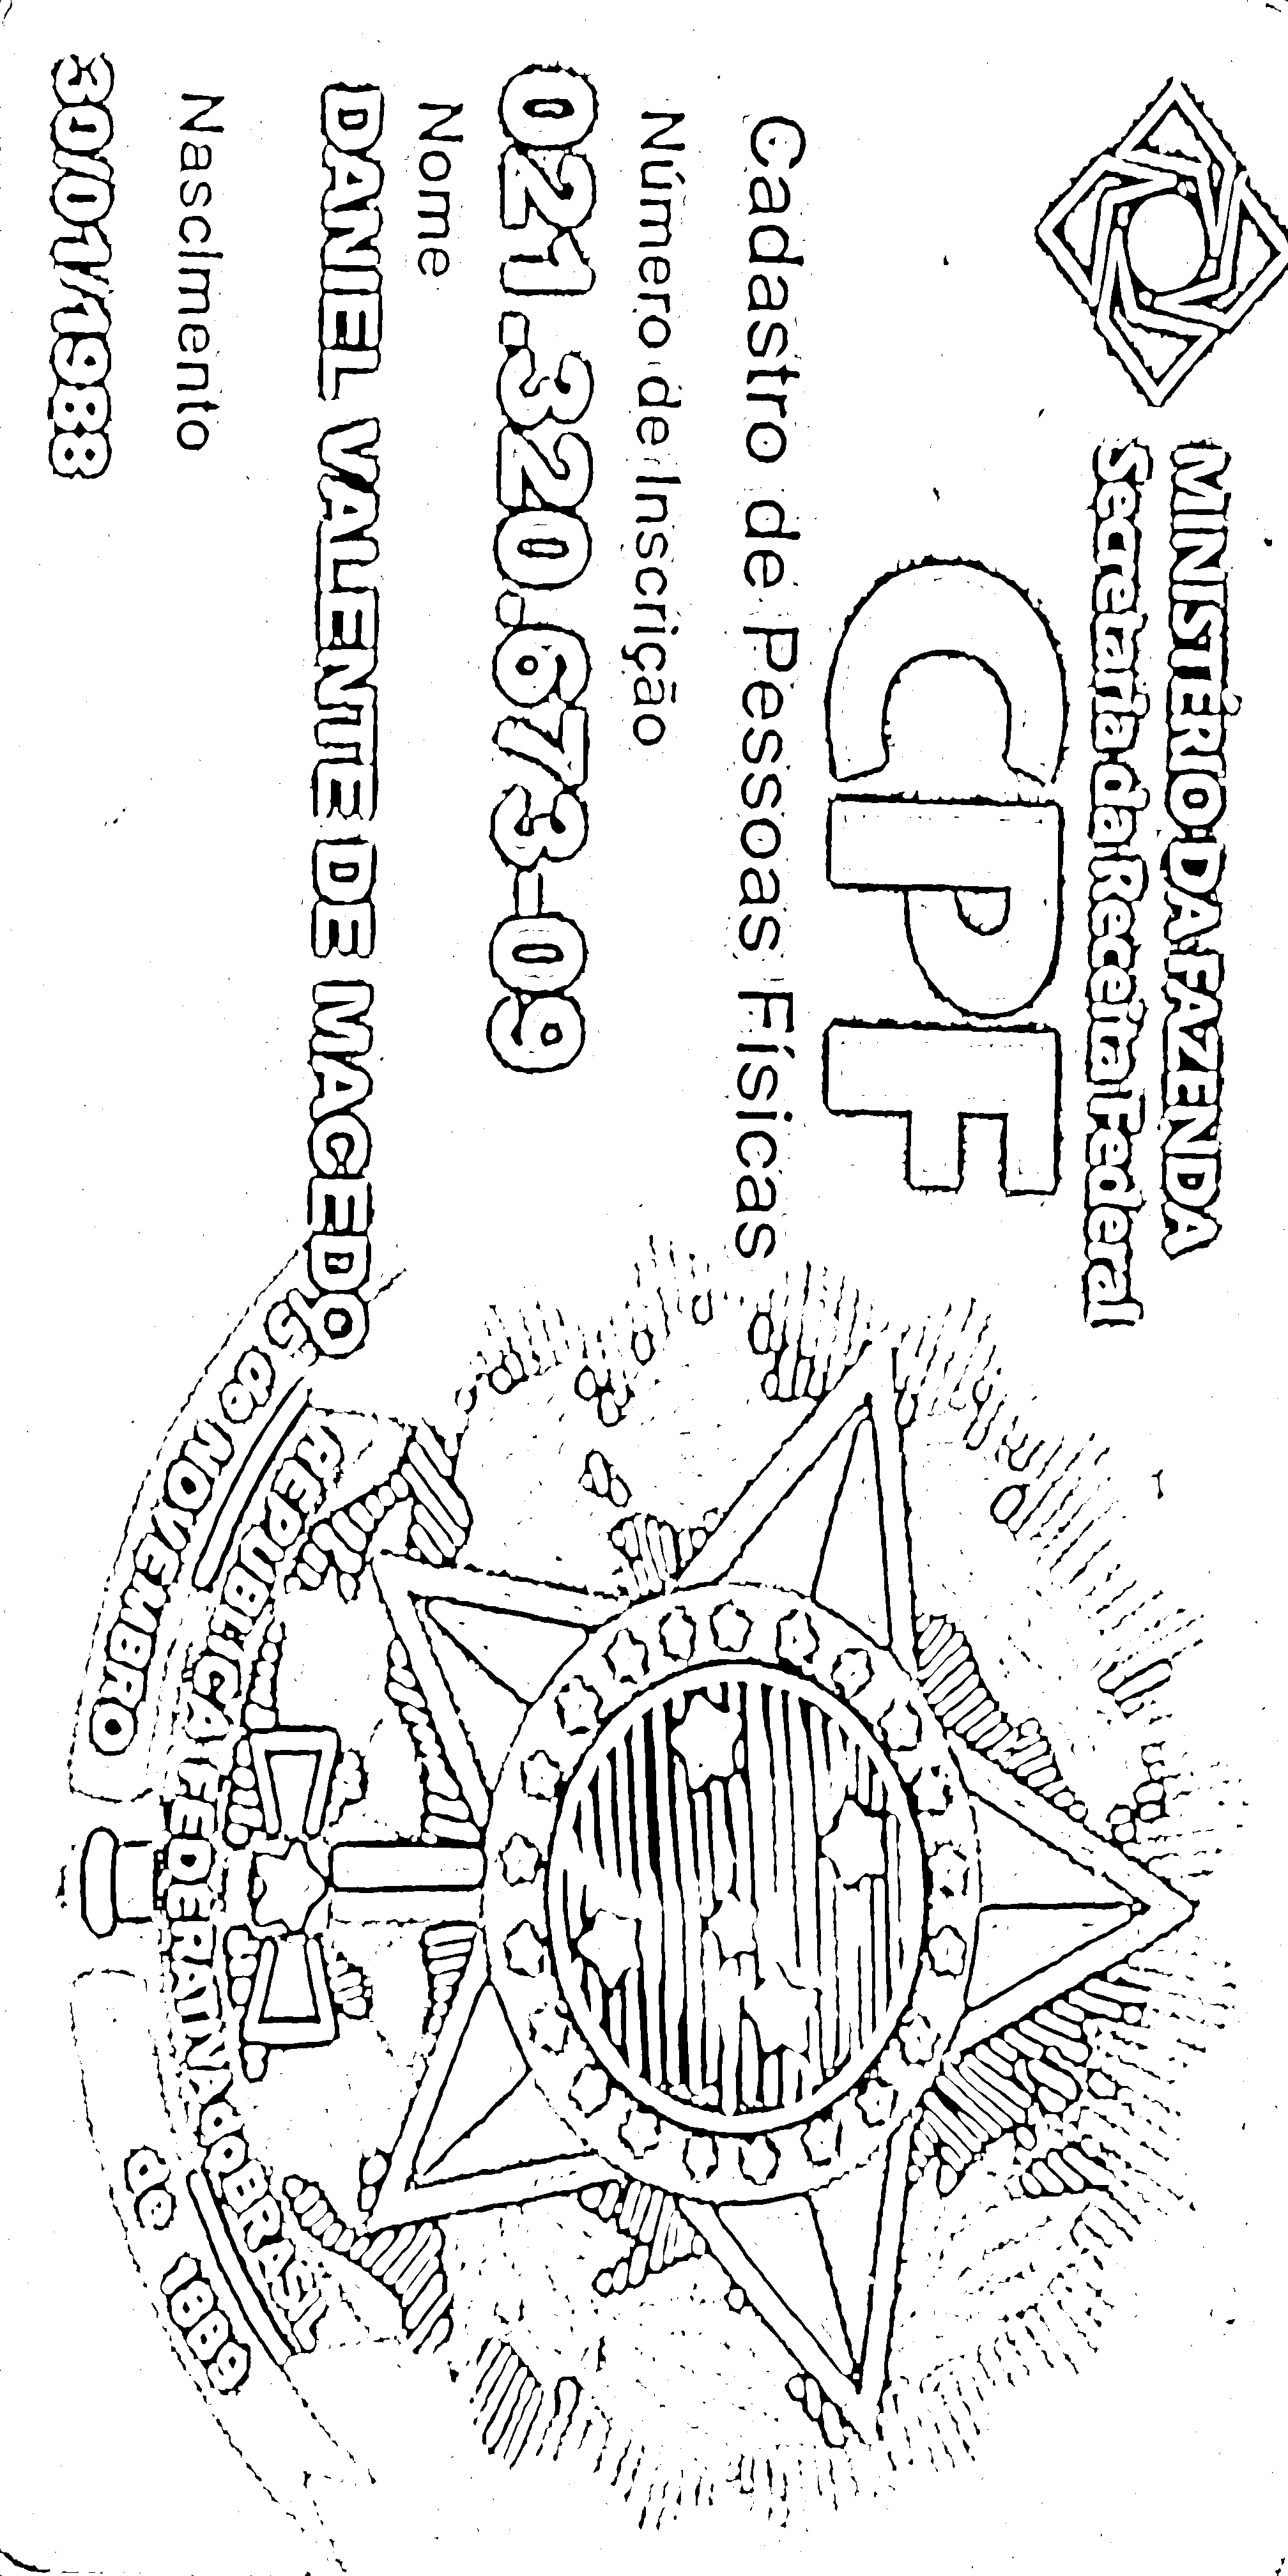

In [ ]:
# from dados.pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
from google.colab.patches import cv2_imshow
from dados import utlis


# pathImage = "dados/CPFw.jpeg"       # ok
pathImage = "dados/CPFblack.jpg"    # ok
# pathImage = "dados/CPFblue.jpg"     # ok
# pathImage = "dados/3.jpeg"          # ok
# pathImage = "dados/1.jpg"           # ok
# pathImage = "dados/c1.jpeg"         # não pegou a forma 
# pathImage = "dados/c2.jpeg"         # não pegou o cartão todo
# pathImage = "dados/c3.jpeg"         # ok

orig  = cv2.imread(pathImage)
cv2_imshow(imutils.resize(orig, height = 500))

ratio = orig.shape[0] / 500.0
# orig = imutils.resize(orig , height = 500)
heightImg = orig.shape[0]
widthImg =  orig.shape[1]

img = orig.copy()
image = orig.copy()


# image = imutils.resize(image, height = 500)

# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray,1, 200)
kernel = np.ones((5,5))
img_dilation = cv2.dilate(edged, kernel, iterations=9)
img_erosion = cv2.erode(img_dilation, kernel, iterations=9) 
# edged = cv2.Canny(img_erosion,75, 200)
edged = img_erosion
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2_imshow(imutils.resize(edged, height = 500))

# # show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
# cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 10)
contours, hierarchy = cv2.findContours(img_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img= cv2.drawContours(img, contours, -1, (0, 255, 0), 20)

# cv2_imshow(img)

biggest, maxArea = biggestContour(contours)
dots(imutils.resize(img, height = 500),biggest,ratio)
print(biggest)
# apply the four point transform to obtain a top-down
# view of the original image
print("recortando")
# print(biggest.reshape(4, 2))
# cv2_imshow(orig)

pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(orig, matrix, (widthImg, heightImg))


# warped = four_point_transform(orig.copy(), biggest.reshape(4, 2))
print("STEP 3: Apply perspective transform")

final_colored= warped.copy()
cv2_imshow(imutils.resize(final_colored, height = 500))
# plt.
# plt.show()
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
print("STEP 3: Apply 'black and white' paper effect")
# warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255

gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
final_binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)
# kernel = np.ones((3,3))
final_binary = cv2.dilate(final_binary, kernel, iterations=1)
cv2_imshow(final_binary)

# final_binary = cv2.erode(edged, kernel, iterations=9) 
# show the original and scanned images
# cv2_imshow(imutils.resize(orig, height = 650))
# final_binary = warped.copy()

# cv2_imshow(final_binary)

In [ ]:

img = orig.copy()
pts =np.array(biggest)

## (1) Crop the bounding rect
rect = cv2.boundingRect(pts)
x,y,w,h = rect
croped = img[y:y+h, x:x+w].copy()

## (2) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)

## (4) add the white background
bg = np.ones_like(croped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


cv2_imshow( croped)
cv2_imshow( mask)
cv2_imshow( dst)
cv2_imshow( dst2)

### teste 1 OCR

In [ ]:
# kernel = np.ones((5,5))
# teste= final.copy()
# img_erosion = cv2.erode(teste, kernel, iterations=1) 
# cv2_imshow(img_erosion)
# img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
# cv2_imshow(img_dilation)
# teste =img_dilation

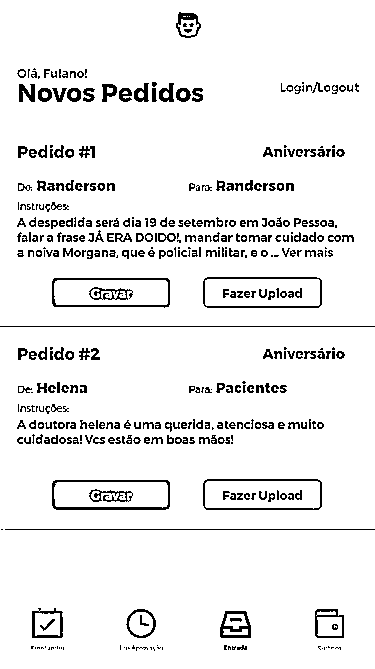

Resultado do OCR:



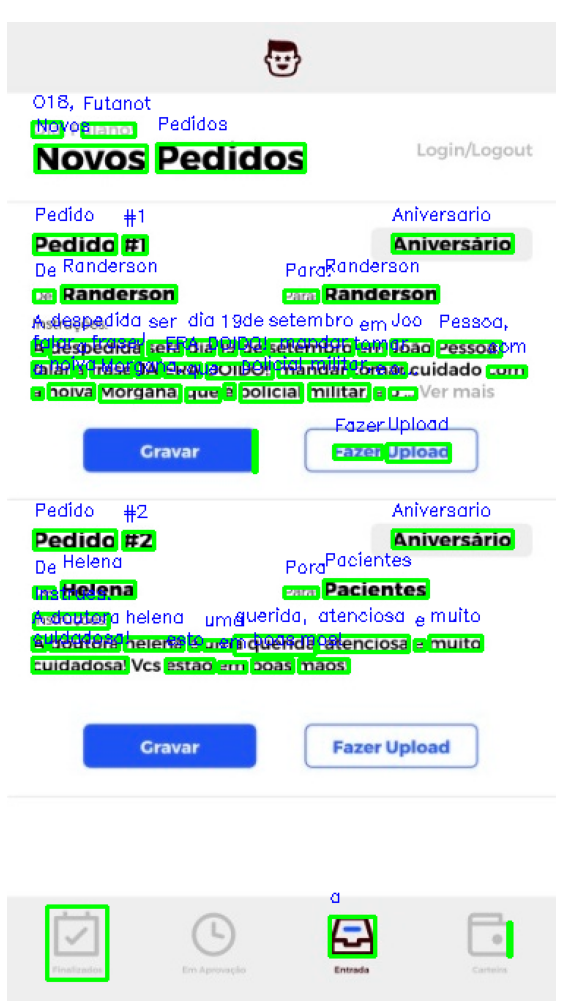

In [ ]:
# codigo base http://pythonclub.com.br/extraindo-texto-de-imagens-com-python.html
import cv2
from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR
from pytesseract import Output
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from google.colab.patches import cv2_imshow
# img = final_colored
# img = final_binary
img = cv2.imread("/content/dados/Idolos1.jpg")
imgo = cv2.imread("/content/dados/Idolos1.jpg")
# img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
# cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = threshold_local(gray, 11, offset = 10, method = "gaussian")
warped = (gray > T).astype("uint8") * 255
cv2_imshow(warped)

img = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)


results = pytesseract.image_to_data(img, output_type=Output.DICT, lang="eng+por")

# Get bounding box estimates
# print(pytesseract.image_to_boxes(img))

# # Get verbose data including boxes, confidences, line and page numbers
# print(pytesseract.image_to_data(img))

# while len(text)==1:
    
# print( pytesseract.image_to_string( img ))

# org_img = cv2.imread(pathImage)
# Shape = org_img.shape
# org_img = cv2.resize(org_img, ( int(Shape[1]/2),int(Shape[0]/2)))
# org_img = cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB)


# plt.figure(figsize=(12,9))
# plt.rcParams['text.color'] = "w"

# plt.subplot(1,2,1)
# plt.axis('off')
# plt.title("Original")
# plt.imshow(org_img)
# cv2_imshow(org_img)

# plt.subplot(1,2,2)
# plt.axis('off')
# plt.title("Ajustada")
# plt.imshow(img)
# # cv2_imshow(img)

# plt.show()

print("Resultado do OCR:\n")
# print(results)


for i in range(0, len(results["text"])):

    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    text = results["text"][i]
    conf = int(results["conf"][i])
    if conf >50:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(imgo, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(imgo, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
            0.4, (0, 0, 255), 1)
        
plt.figure(figsize=(18,18))
plt.title("Resultado do OCR:")
plt.rcParams['text.color'] = "w"
plt.axis('off')
plt.imshow(imgo)
# cv2_imshow(img)

plt.show()

### teste 2 OCR Multiplas imagens

In [ ]:
from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR
from pytesseract import Output
import matplotlib.pyplot as plt
import pandas as pd

results=[]
img_colored = final_colored.copy()
# img_colored = cv2.rotate(img_colored, cv2.ROTATE_90_CLOCKWISE)
img_colored = cv2.cvtColor(img_colored, cv2.COLOR_BGR2RGB)

img_binary = final_binary.copy()
# img_binary = cv2.rotate(img_binary, cv2.ROTATE_90_CLOCKWISE)
img_binary = cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB)

results.append(pytesseract.image_to_data(img_colored, output_type=Output.DICT, lang="eng+por"))
results.append(pytesseract.image_to_data(img_binary, output_type=Output.DICT, lang="eng+por"))
results.append(pytesseract.image_to_data(cv2.bitwise_not(img_binary), output_type=Output.DICT, lang="eng+por"))
results.append(pytesseract.image_to_data(cv2.cvtColor(img_colored, cv2.COLOR_RGB2GRAY), output_type=Output.DICT, lang="eng+por"))

# print(results[0]["text"])
# print(results[1]["text"])
dados = pd.DataFrame.from_dict(results[0])
for i in range(1,len(results)):
    dados = pd.concat([dados, pd.DataFrame.from_dict(results[i])], ignore_index=True)
dados.conf=dados.conf.astype(int)
dados= dados.query("conf>50")
bad_chars= [""," ","\n","\t"]
filtro = dados[dados["text"].apply(lambda x: not ''.join(i for i in x if not i in bad_chars) == "")]
filtro.reset_index()
# filtro

index  level  page_num  block_num  ...  width  height  conf            text
0       8      5         1          2  ...    155    1558    90  021.320.673-09
1      12      5         1          3  ...     85     476    90          DANIEL
2      13      5         1          3  ...     87     610    90         VALENTE
3      14      5         1          3  ...     82     167    96              DE
4      15      5         1          3  ...    153     572    96          MACEDO
5      19      5         1          4  ...     86     643    94      30/01/1988
6      28      5         1          2  ...    222     607    88       “Cadastro
7      29      5         1          2  ...    125     177    96              de
8      30      5         1          2  ...    204     579    82        Pessoas:
9      31      5         1          2  ...    146     417    93         Físicas
10     34      5         1          2  ...    156     453    76         “Número
11     40      5         1          2  ...     92     292    94            Nome
12     48      5         1          3  ...    269     310    63               É
13     56      5         1          5  ...    152     560    95      Nascimento
14     57      5         1          5  ...      4       6    79               |
15     66      5         1          2  ...    222     607    88       “Cadastro
16     67      5         1          2  ...    125     177    96              de
17     72      5         1          2  ...    156     453    78         “Número
18     76      5         1          2  ...    172     246    91              02
19     78      5         1          2  ...     92     292    94            Nome
20     92      5         1          5  ...      4       6    80               |
21     97      5         1          1  ...    103     590    91      MINISTERIO
22     98      5         1          1  ...     78     149    92              DA
23     99      5         1          1  ...     82     465    91         FAZENDA
24    102      5         1          1  ...     80     472    95      Secretaria
25    103      5         1          1  ...     79     120    93              da
26    104      5         1          1  ...     80     342    90         Receita
27    105      5         1          1  ...     81     348    95         Federal
28    117      5         1          4  ...    154    1555    91  021.320.673-09
29    118      5         1          4  ...    101     232    79               =
30    126      5         1          5  ...    183     306    56              a)
31    135      5         1          5  ...     79     111    62               3
32    136      5         1          5  ...     58      79    82              he
33    137      5         1          5  ...     61     111    79              as
34    140      5         1          5  ...     36     149    54              AA
35    148      5         1          7  ...     83     640    92      39/01/1988

[36 rows x 13 columns]

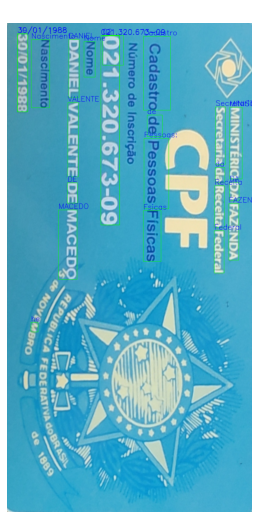

In [ ]:

img =  img_colored.copy()
for results in filtro.itertuples():
    # print(results)
    x = results.left
    y = results.top
    w = results.width
    h = results.height

    text = results.text
    conf = int(results.conf)
    if conf >80:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
            2, (0, 0, 255),2)
        
plt.figure(figsize=(18,9))
plt.title("Resultado do OCR:")
plt.rcParams['text.color'] = "w"
plt.axis('off')
plt.imshow(img)
# cv2_imshow(img)

plt.show()